# PRÁCTICA M41

# 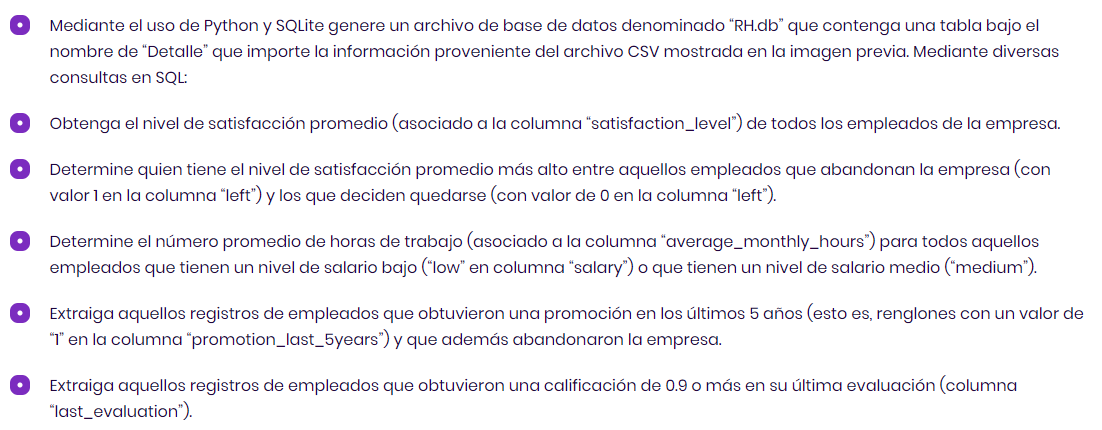

In [5]:
# importamos SQLITE3
# Creamos la coneccion a la BD

import sqlite3
conn = sqlite3.connect('RH.db')

In [13]:
# creamos el cursor

cur = conn.cursor()

In [8]:
# Lectura del archivo CSV

import os
import csv

os.chdir('C:/Users/Isaac/Desktop/IHD/EBAC DT/CIENCIA DE DATOS/M41 DS')
with open('recursos_humanos.csv') as f:
    reader = csv.reader(f)
    data = list(reader)

In [11]:
data

[['satisfaction_level',
  'last_evaluation',
  'number_project',
  'average_montly_hours',
  'time_spend_company',
  'Work_accident',
  'left',
  'promotion_last_5years',
  'sales',
  'salary'],
 ['0.38', '0.53', '2', '157', '3', '0', '1', '0', 'sales', 'low'],
 ['0.8', '0.86', '5', '262', '6', '0', '1', '0', 'sales', 'medium'],
 ['0.11', '0.88', '7', '272', '4', '0', '1', '0', 'sales', 'medium'],
 ['0.72', '0.87', '5', '223', '5', '0', '1', '0', 'sales', 'low'],
 ['0.37', '0.52', '2', '159', '3', '0', '1', '0', 'sales', 'low'],
 ['0.41', '0.5', '2', '153', '3', '0', '1', '0', 'sales', 'low'],
 ['0.1', '0.77', '6', '247', '4', '0', '1', '0', 'sales', 'low'],
 ['0.92', '0.85', '5', '259', '5', '0', '1', '0', 'sales', 'low'],
 ['0.89', '1', '5', '224', '5', '0', '1', '0', 'sales', 'low'],
 ['0.42', '0.53', '2', '142', '3', '0', '1', '0', 'sales', 'low'],
 ['0.45', '0.54', '2', '135', '3', '0', '1', '0', 'sales', 'low'],
 ['0.11', '0.81', '6', '305', '4', '0', '1', '0', 'sales', 'low'],
 

In [12]:
len(data)

15000

In [14]:
# creación de la tabla Detalle

cur.execute("""
    CREATE TABLE Detalle(
    satisfaction_level REAL,
    last_evaluation REAL,
    number_project REAL,
    average_montly_hours REAL,
    time_spend_company REAL,
    Work_accident REAL,
    left REAL,
    promotion_last_5years REAL,
    sales TEXT,
    salary TEXT);
""")

In [15]:
# Insertamos registros

for renglon in range(1, len(data)):
    cur.execute("""
        INSERT INTO Detalle('satisfaction_level','last_evaluation','number_project','average_montly_hours',
        'time_spend_company','Work_accident','left','promotion_last_5years','sales','salary')
        VALUES(?,?,?,?,?,?,?,?,?,?)
    """, data[renglon])

In [16]:
conn.commit()

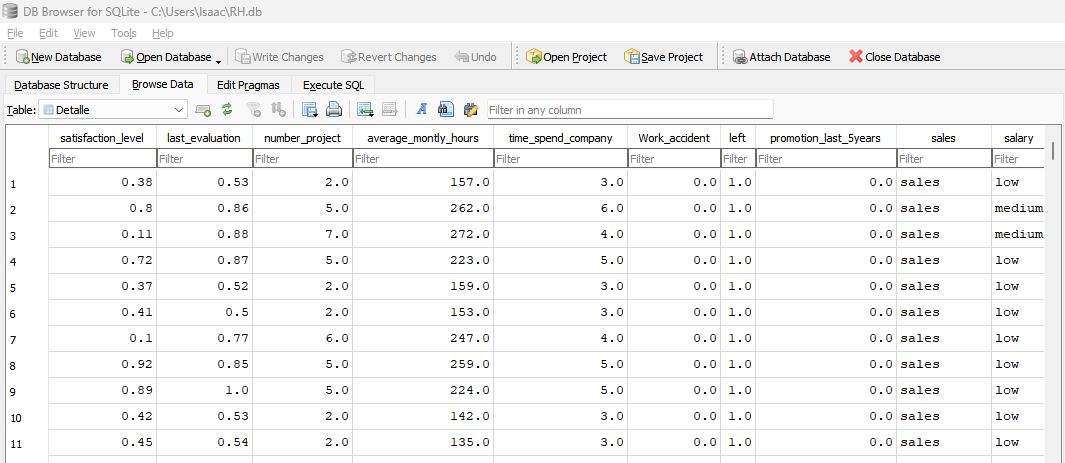

* Obtenga el nivel de satisfacción promedio (asociado a la columna “satisfaction_level”) de todos los empleados de la empresa.

In [17]:
cur.execute("""
    SELECT AVG(satisfaction_level)
    FROM Detalle
""")
res = cur.fetchall()
res

[(0.6128335222348166,)]

* Determine quien tiene el nivel de satisfacción promedio más alto entre aquellos empleados que abandonan la empresa (con valor 1 en la columna “left”) y los que deciden quedarse (con valor de 0 en la columna “left”).

In [24]:
cur.execute("""
    SELECT left, AVG(satisfaction_level) AS AVG_Satisfaction
    FROM Detalle
    GROUP BY left
""")
res = cur.fetchall()
res

[(0.0, 0.666809590479516), (1.0, 0.44009801176140917)]

* Determine el número promedio de horas de trabajo (asociado a la columna “average_monthly_hours”) para todos aquellos empleados que tienen un nivel de salario bajo (“low” en columna “”) o que tienen un nivel de salario medio (“medium”). 

In [26]:
cur.execute("""
    SELECT AVG(average_montly_hours)
    FROM Detalle
    WHERE salary = 'low' OR salary = 'medium'
""")
res = cur.fetchall()
res

[(201.15666327568667,)]

* Extraiga aquellos registros de empleados que obtuvieron una promoción en los últimos 5 años (esto es, renglones con un valor de “1” en la columna “promotion_last_5years”) y que además abandonaron la empresa.

In [36]:
cur.execute("""
    SELECT *
    FROM Detalle
    WHERE promotion_last_5years = '1' AND left = '1'
""")
res = cur.fetchall()
res

[(0.45, 0.51, 2.0, 160.0, 3.0, 1.0, 1.0, 1.0, 'sales', 'low'),
 (0.79, 0.59, 4.0, 139.0, 3.0, 0.0, 1.0, 1.0, 'management', 'low'),
 (0.41, 0.46, 2.0, 160.0, 3.0, 0.0, 1.0, 1.0, 'sales', 'low'),
 (0.11, 0.79, 6.0, 292.0, 4.0, 0.0, 1.0, 1.0, 'technical', 'low'),
 (0.41, 0.56, 2.0, 154.0, 3.0, 0.0, 1.0, 1.0, 'support', 'medium'),
 (0.46, 0.45, 2.0, 138.0, 3.0, 0.0, 1.0, 1.0, 'IT', 'low'),
 (0.87, 1.0, 4.0, 258.0, 5.0, 1.0, 1.0, 1.0, 'sales', 'medium'),
 (0.44, 0.55, 2.0, 128.0, 3.0, 0.0, 1.0, 1.0, 'IT', 'medium'),
 (0.45, 0.51, 2.0, 160.0, 3.0, 1.0, 1.0, 1.0, 'sales', 'low'),
 (0.79, 0.59, 4.0, 139.0, 3.0, 0.0, 1.0, 1.0, 'management', 'low'),
 (0.41, 0.46, 2.0, 160.0, 3.0, 0.0, 1.0, 1.0, 'sales', 'low'),
 (0.11, 0.79, 6.0, 292.0, 4.0, 0.0, 1.0, 1.0, 'technical', 'low'),
 (0.41, 0.56, 2.0, 154.0, 3.0, 0.0, 1.0, 1.0, 'support', 'medium'),
 (0.46, 0.45, 2.0, 138.0, 3.0, 0.0, 1.0, 1.0, 'IT', 'low'),
 (0.45, 0.51, 2.0, 160.0, 3.0, 1.0, 1.0, 1.0, 'sales', 'low'),
 (0.79, 0.59, 4.0, 139.0, 3.0, 

* Extraiga aquellos registros de empleados que obtuvieron una calificación de 0.9 o más en su última evaluación (columna “last_evaluation”).

In [35]:
cur.execute("""
    SELECT *
    FROM Detalle
    WHERE last_evaluation >= 0.9
""")
res = cur.fetchall()
res

[(0.89, 1.0, 5.0, 224.0, 5.0, 0.0, 1.0, 0.0, 'sales', 'low'),
 (0.84, 0.92, 4.0, 234.0, 5.0, 0.0, 1.0, 0.0, 'sales', 'low'),
 (0.78, 0.99, 4.0, 255.0, 6.0, 0.0, 1.0, 0.0, 'sales', 'low'),
 (0.09, 0.95, 6.0, 304.0, 4.0, 0.0, 1.0, 0.0, 'sales', 'low'),
 (0.89, 0.92, 5.0, 242.0, 5.0, 0.0, 1.0, 0.0, 'sales', 'low'),
 (0.1, 0.94, 6.0, 255.0, 4.0, 0.0, 1.0, 0.0, 'technical', 'low'),
 (0.1, 0.92, 7.0, 307.0, 4.0, 0.0, 1.0, 0.0, 'support', 'low'),
 (0.11, 0.94, 7.0, 255.0, 4.0, 0.0, 1.0, 0.0, 'support', 'low'),
 (0.85, 1.0, 4.0, 225.0, 5.0, 0.0, 1.0, 0.0, 'technical', 'low'),
 (0.85, 0.91, 5.0, 226.0, 5.0, 0.0, 1.0, 0.0, 'management', 'medium'),
 (0.11, 0.93, 7.0, 308.0, 4.0, 0.0, 1.0, 0.0, 'IT', 'medium'),
 (0.1, 0.95, 6.0, 244.0, 5.0, 0.0, 1.0, 0.0, 'IT', 'medium'),
 (0.11, 0.94, 6.0, 286.0, 4.0, 0.0, 1.0, 0.0, 'IT', 'medium'),
 (0.9, 0.98, 4.0, 264.0, 6.0, 0.0, 1.0, 0.0, 'product_mng', 'medium'),
 (0.74, 0.99, 2.0, 277.0, 3.0, 0.0, 1.0, 0.0, 'IT', 'medium'),
 (0.11, 0.97, 6.0, 277.0, 4.0, 0